Analyse the correlation between external features and rent price

In [1]:
#generate a rent dataframe with proximity to cbd and proximity to nearest train station, school
import pandas as pd
from pathlib import Path
rent_dir = Path.cwd().parent/'data'/'curated'/'rent_with_proximity.csv'
cbd_dir = Path.cwd().parent/'data'/'curated'/'dist_dur_to_cbd.csv'
rent_df = pd.read_csv(rent_dir)
cbd_df = pd.read_csv(cbd_dir)





In [2]:
rent_df

,suburb,postcode,latitude,longitude,isNewDevelopment,bathrooms,bedrooms,carspaces,propertyTypes,status,channel,price_per_week,time_to_nearest_train_station(min),distance_to_nearest_train_station(km),distance_to_nearest_school(km),time_to_nearest_school(min)
0,Mount Martha,3934,-38.268818,145.014034,False,3,3,2,house,live,residential,1600.0,21.12,18.74,1.22,4.65
1,Bentleigh East,3165,-37.909091,145.055152,False,2,3,2,house,live,residential,780.0,3.65,2.00,0.39,0.99
2,Ferntree Gully,3156,-37.890452,145.267922,False,1,3,2,house,live,residential,585.0,8.91,4.68,0.80,2.19
3,Frankston North,3200,-38.115353,145.163260,False,1,3,2,house,live,residential,475.0,8.21,3.28,0.23,0.47
4,Camberwell,3124,-37.840108,145.094830,False,1,2,1,house,live,residential,590.0,4.45,2.43,0.91,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,Melbourne,3000,-37.809580,144.960120,False,1,2,0,apartmentUnitFlat,live,residential,680.0,1.32,0.59,0.80,1.81
2958,Melbourne,3000,-37.810002,144.958818,False,2,2,0,apartmentUnitFlat,live,residential,800.0,1.02,0.47,0.68,1.52
2959,Capel Sound,3940,-38.372306,144.884492,False,1,3,2,house,live,residential,500.0,29.28,30.71,0.37,1.50
2960,Bendigo,3550,-36.759161,144.267363,False,1,3,1,house,live,residential,560.0,6.36,2.85,0.53,1.53


In [3]:
cbd_df

,Unnamed: 0,min_dist,min_dur
0,0,77980.16,4052.63
1,1,18463.67,1724.63
2,2,38993.27,2457.46
3,3,50375.36,2703.94
4,4,15235.71,1499.86
...,...,...,...
2957,2957,1455.95,207.94
2958,2958,1630.43,214.88
2959,2959,92966.10,4412.69
2960,2960,150783.36,7089.45


In [4]:
cbd_df['min_dist'] = cbd_df['min_dist'] / 1000
cbd_df['min_dur'] = cbd_df['min_dur'] / 60

In [5]:
cbd_df.rename(columns={'min_dist': 'distance_to_CBD(km)', 'min_dur': 'time_to_CBD(min)'}, inplace=True)

In [6]:
rent_df[['distance_to_CBD(km)','time_to_CBD(min)']] = cbd_df[['distance_to_CBD(km)','time_to_CBD(min)']]

Find out average rent per room for each rent property, 

num of room = num of bedroom + 1/2*num of bathroom + 1/4*num of car space

In [7]:
rent_df['rent_median'] = rent_df['price_per_week'] / (rent_df['bedrooms'] + 1/3*rent_df['bathrooms'] + 1/4*rent_df['carspaces'])

In [ ]:
rent_df

,suburb,postcode,latitude,longitude,isNewDevelopment,bathrooms,bedrooms,carspaces,propertyTypes,status,channel,price_per_week,time_to_nearest_train_station(min),distance_to_nearest_train_station(km),distance_to_nearest_school(km),time_to_nearest_school(min),distance_to_CBD(km),time_to_CBD(min),rent_median
0,Mount Martha,3934,-38.268818,145.014034,False,3,3,2,house,live,residential,1600.0,21.12,18.74,1.22,4.65,77.98016,67.543833,355.555556
1,Bentleigh East,3165,-37.909091,145.055152,False,2,3,2,house,live,residential,780.0,3.65,2.00,0.39,0.99,18.46367,28.743833,187.200000
2,Ferntree Gully,3156,-37.890452,145.267922,False,1,3,2,house,live,residential,585.0,8.91,4.68,0.80,2.19,38.99327,40.957667,152.608696
3,Frankston North,3200,-38.115353,145.163260,False,1,3,2,house,live,residential,475.0,8.21,3.28,0.23,0.47,50.37536,45.065667,123.913043
4,Camberwell,3124,-37.840108,145.094830,False,1,2,1,house,live,residential,590.0,4.45,2.43,0.91,2.11,15.23571,24.997667,228.387097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,Melbourne,3000,-37.809580,144.960120,False,1,2,0,apartmentUnitFlat,live,residential,680.0,1.32,0.59,0.80,1.81,1.45595,3.465667,291.428571
2958,Melbourne,3000,-37.810002,144.958818,False,2,2,0,apartmentUnitFlat,live,residential,800.0,1.02,0.47,0.68,1.52,1.63043,3.581333,300.000000
2959,Capel Sound,3940,-38.372306,144.884492,False,1,3,2,house,live,residential,500.0,29.28,30.71,0.37,1.50,92.96610,73.544833,130.434783
2960,Bendigo,3550,-36.759161,144.267363,False,1,3,1,house,live,residential,560.0,6.36,2.85,0.53,1.53,150.78336,118.157500,156.279070


Find out the average time and distance to nearest to nearest train_station, school, cbd in each surburb

In [9]:
# Group by 'postcode' and calculate average values for the specified columns
rent_groupby_df = rent_df.groupby('postcode').agg({
    'price_per_week': 'mean',
    'rent_median': 'mean',
    'time_to_nearest_train_station(min)': 'mean',
    'distance_to_nearest_train_station(km)': 'mean',
    'distance_to_nearest_school(km)': 'mean',
    'time_to_nearest_school(min)': 'mean',
    'distance_to_CBD(km)': 'mean',
    'time_to_CBD(min)': 'mean'
}).reset_index()

In [10]:
rent_groupby_df

,postcode,price_per_week,rent_median,time_to_nearest_train_station(min),distance_to_nearest_train_station(km),distance_to_nearest_school(km),time_to_nearest_school(min),distance_to_CBD(km),time_to_CBD(min)
0,3000,664.009091,336.727377,1.841136,0.754409,0.650136,1.650727,1.549724,3.688702
1,3002,808.833333,325.042273,2.056667,0.821667,0.736667,2.066667,2.294232,5.530028
2,3003,673.636364,311.263771,1.939545,0.785455,0.576364,1.337273,2.426752,5.505985
3,3004,647.592593,346.475157,3.092222,1.551481,0.758889,1.735926,4.925956,10.730778
4,3006,751.390805,338.441515,3.846897,1.524023,0.893793,2.302759,3.113744,7.492851
...,...,...,...,...,...,...,...,...,...
328,3978,620.694444,128.222030,12.050000,7.820833,2.577778,4.769444,56.327191,54.031153
329,3981,200.000000,600.000000,14.090000,13.290000,3.200000,4.020000,71.455450,59.582167
330,3984,350.000000,135.483871,54.950000,66.170000,9.050000,9.260000,98.990300,79.529500
331,3995,455.000000,113.338710,80.316667,98.096667,4.293333,6.936667,130.916540,104.897944


Correlation between rent and distance to train station, school, CBD

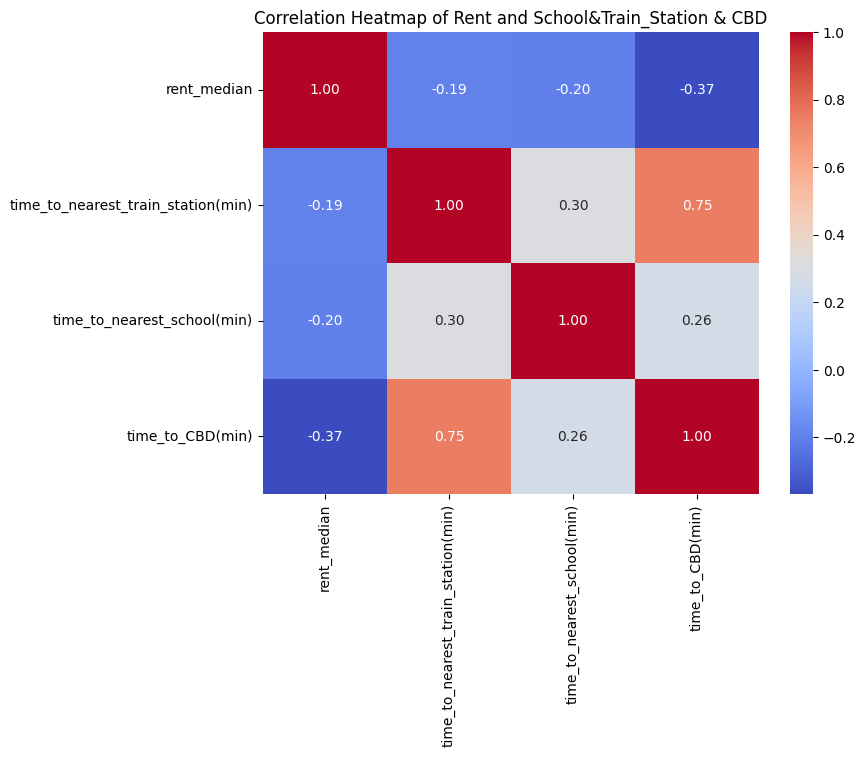

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_columns = ['rent_median', 'time_to_nearest_train_station(min)', 'time_to_nearest_school(min)', 'time_to_CBD(min)']

# Create a correlation matrix for the selected columns
corr_matrix = rent_groupby_df[selected_columns].corr()

# Rearrange the correlation matrix to ensure 'rent_per_room' is at the first row and column
corr_matrix_dist = corr_matrix.loc[['rent_median'] + [col for col in corr_matrix.columns if col != 'rent_median'], 
                              ['rent_median'] + [col for col in corr_matrix.columns if col != 'rent_median']]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_dist, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Rent and School&Train_Station & CBD")
plot_path = Path.cwd().parent / 'plots' / 'rent_school_train_CBD_heatmap.png'
# Save the figure
plt.savefig(plot_path, bbox_inches='tight')
plt.show()

Correlation between rent and population & income 

In [12]:
average_rent_df = pd.read_csv(Path.cwd().parent/'data'/'curated'/'training_data_raw.csv')
pd.set_option('display.max_columns', None)
average_rent_df


,suburb,postcode,SA2,SA2 NAME,geometry,2000_rent_count,2000_rent_median,2001_rent_count,2001_rent_median,2002_rent_count,2002_rent_median,2003_rent_count,2003_rent_median,2004_rent_count,2004_rent_median,2005_rent_count,2005_rent_median,2006_rent_count,2006_rent_median,2007_rent_count,2007_rent_median,2008_rent_count,2008_rent_median,2009_rent_count,2009_rent_median,2010_rent_count,2010_rent_median,2011_rent_count,2011_rent_median,2012_rent_count,2012_rent_median,2013_rent_count,2013_rent_median,2014_rent_count,2014_rent_median,2015_rent_count,2015_rent_median,2016_rent_count,2016_rent_median,2017_rent_count,2017_rent_median,2018_rent_count,2018_rent_median,2019_rent_count,2019_rent_median,2020_rent_count,2020_rent_median,2021_rent_count,2021_rent_median,2022_rent_count,2022_rent_median,2001_population,2002_population,2003_population,2004_population,2005_population,2006_population,2007_population,2008_population,2009_population,2010_population,2011_population,2012_population,2013_population,2014_population,2015_population,2016_population,2017_population,2018_population,2019_population,2020_population,2021_population,2022_population,2023_population,population_growth_rate,2024_population,2025_population,2026_population,2016_income,2017_income,2018_income,2019_income,2020_income,average_income,income_growth_rate,affluence_index,geometry.1
0,Albert Park-Middle Park-West St Kilda,3004.0,206041119,East Melbourne,POLYGON ((144.9739585748236 -37.81330241814959...,4632.0,266.25,4990.0,281.25,4097,300.000000,6844,295.0,4963,300.00,5048,302.50,4101,317.00,3430,362.50,3609,389.50,3690,417.50,3849,431.25,3666,445.00,3892,460.00,3894,461.50,4044,472.50,3721,491.25,3823,515.00,3600,527.75,3649,562.50,3495,568.00,3342,570.00,3695,498.75,3435,510.0,3731,3859,4243,4460,4495,4555,4806,5055,5202,5272,5238,5280,5333,5374,5411,5475,5496,5412,5416,5383,4959,4889,5100,0.014868,5175.824488,5252.776301,5330.872198,69469.0,71759.0,75755.0,77804.0,81648.0,75287.0,0.175316,52700.952595,POLYGON ((144.9739585748236 -37.81330241814959...
1,Albert Park-Middle Park-West St Kilda,3004.0,206041125,South Yarra - West,POLYGON ((144.97455041239857 -37.8346653683224...,4632.0,266.25,4990.0,281.25,4097,300.000000,6844,295.0,4963,300.00,5048,302.50,4101,317.00,3430,362.50,3609,389.50,3690,417.50,3849,431.25,3666,445.00,3892,460.00,3894,461.50,4044,472.50,3721,491.25,3823,515.00,3600,527.75,3649,562.50,3495,568.00,3342,570.00,3695,498.75,3435,510.0,5317,5233,5176,5183,5289,5538,5837,6118,6380,6418,6426,6400,6393,6397,6405,6453,6833,6957,7055,6960,6536,6573,6789,0.011538,6867.332701,6946.569219,7026.719983,64865.0,68512.0,70451.0,69578.0,72567.0,69194.6,0.118739,48436.255622,POLYGON ((144.97455041239857 -37.8346653683224...
2,Albert Park-Middle Park-West St Kilda,3004.0,206051128,Albert Park,POLYGON ((144.96766973330057 -37.8373669078686...,4632.0,266.25,4990.0,281.25,4097,300.000000,6844,295.0,4963,300.00,5048,302.50,4101,317.00,3430,362.50,3609,389.50,3690,417.50,3849,431.25,3666,445.00,3892,460.00,3894,461.50,4044,472.50,3721,491.25,3823,515.00,3600,527.75,3649,562.50,3495,568.00,3342,570.00,3695,498.75,3435,510.0,12368,12595,12800,12997,13269,13550,13731,13928,14245,14595,15009,15142,15282,15592,16053,16490,16500,16728,17081,16955,16011,16177,16861,0.014356,17103.056186,17348.587326,17597.643306,65352.0,66627.0,67518.0,68933.0,73107.0,68307.4,0.118665,47815.215600,POLYGON ((144.96766973330057 -37.8373669078686...
3,Albert Park-Middle Park-West St Kilda,3004.0,206051513,St Kilda - Central,POLYGON ((144.9822465081365 -37.86154000901546...,4632.0,266.25,4990.0,281.25,4097,300.000000,6844,295.0,4963,300.00,5048,302.50,4101,317.00,3430,362.50,3609,389.50,3690,417.50,3849,431.25,3666,445.00,3892,460.00,3894,461.50,4044,472.50,3721,491.25,3823,515.00,3600,527.75,3649,562.50,3495,568.00,3342,570.00,3695,498.75,3435,510.0,8558,8675,8836,8965,9145,9340,9650,9924,10268,10494,10751,11323,11798,12234,12561,13014,13315,13589,13676,13380,12086,12256,13186,0.020345,13454.264995,137

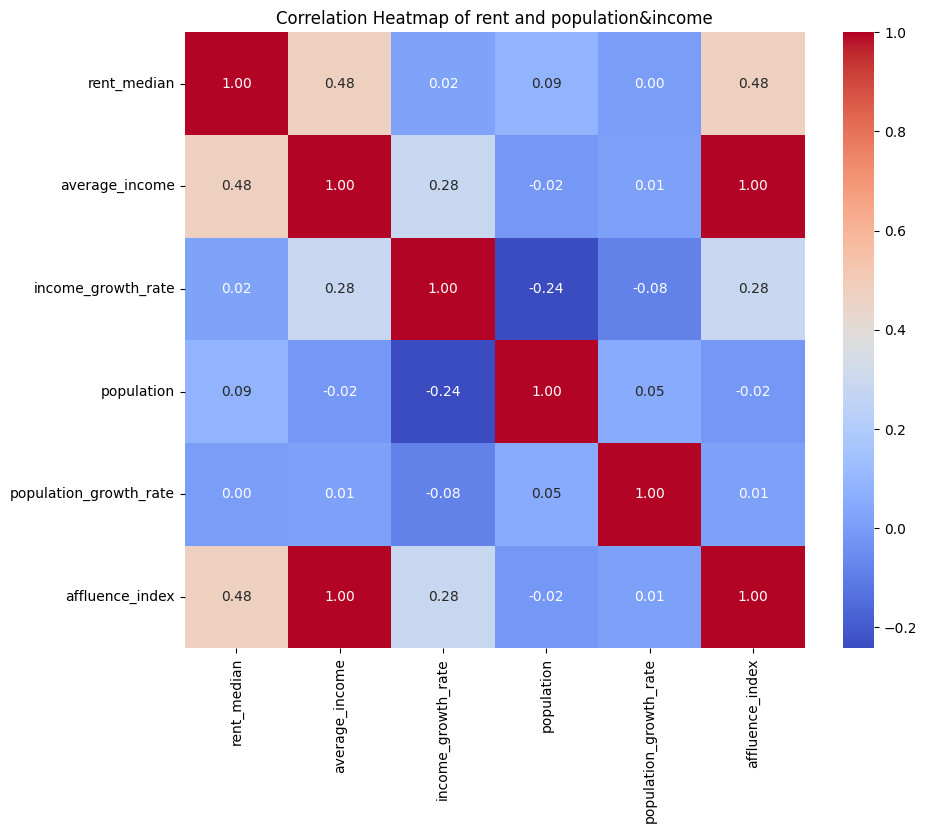

In [13]:
average_rent_df.rename(columns={'2022_population': 'population','2022_rent_median':'rent_median' }, inplace=True)
# Select the required columns from the DataFrame
selected_columns = ['rent_median', 'average_income', 'income_growth_rate', 
                    'population', 'population_growth_rate', 'affluence_index']

# Create a correlation matrix for the selected columns
corr_matrix_income = average_rent_df[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix_income, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap of rent and population&income")
plot_path = Path.cwd().parent / 'plots' / 'rent_population_income_heatmap.png'
# Save the figure
plt.savefig(plot_path, bbox_inches='tight')
plt.show()



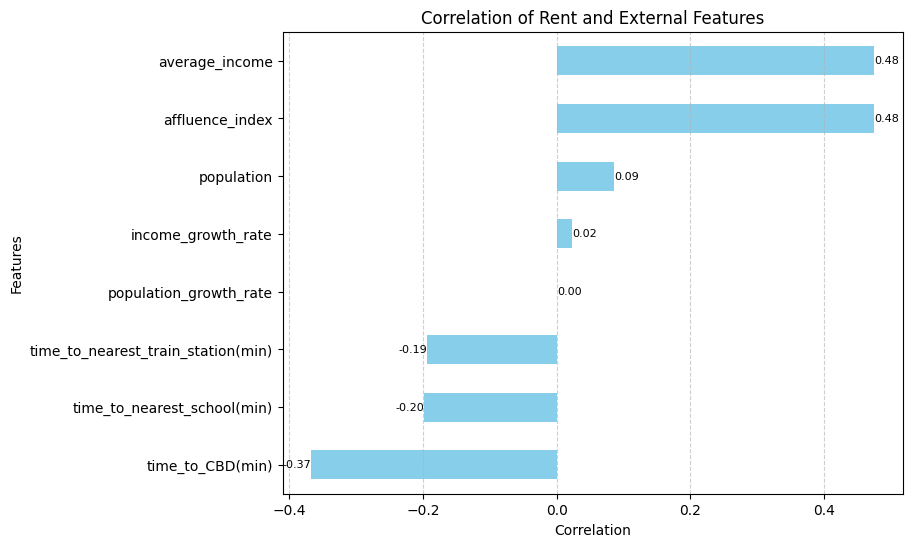

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the columns of interest
selected_columns = ['rent_median', 'time_to_nearest_train_station(min)', 
                    'time_to_nearest_school(min)', 'time_to_CBD(min)']

# Calculate the correlation matrix for the selected columns
# Note: Ensure 'rent_groupby_df', 'corr_matrix_dist', and 'corr_matrix_income' are defined earlier in your script
corr_matrix = rent_groupby_df[selected_columns].corr()

# Extract the correlations of 'rent_per_room' with the other selected columns
correlations_distance = corr_matrix_dist.loc['rent_median', ['time_to_nearest_train_station(min)', 
                                                 'time_to_nearest_school(min)', 'time_to_CBD(min)']]
correlations_income =corr_matrix_income.loc['rent_median', ['average_income', 'income_growth_rate', 
                                                           'population', 'population_growth_rate', 'affluence_index']]
correlations = pd.concat([correlations_distance, correlations_income])
correlations = correlations.sort_values()

# Plot the correlation as a horizontal bar chart
plt.figure(figsize=(8, 6))
bars = correlations.plot(kind='barh', color='skyblue')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlation of Rent and External Features')
plt.grid(axis='x', linestyle='--', alpha=0.6)


# Add text labels at the end of each bar
for index, value in enumerate(correlations):
    plt.text(
        value, index,        # x, y coordinates
        f'{value:.2f}',      # The text label
        va='center',         # Vertical alignment
        ha='right' if value < 0 else 'left',  # Horizontal alignment based on value sign
        color='black',
        fontsize=8
    )
plot_path = Path.cwd().parent / 'plots' / 'external_feature_correlations.png'
plt.savefig(plot_path, bbox_inches='tight')
plt.show()


Average Income vs. Rent:

Correlation Value: 0.48
Interpretation: There is a moderate positive correlation between average income and rent median. This suggests that regions with higher average incomes tend to have higher rental prices. This relationship is logical as people in areas with higher incomes are likely to afford higher rents, making income a significant predictor of rental prices.
Affluence Index vs. Rent:

Correlation Value: 0.48
Interpretation: The affluence index, which is a combined metric of income and population, also shows a moderate positive correlation with rental prices. This indicates that more affluent areas (i.e., higher income and better socio-economic conditions) tend to have higher rental prices. This index could serve as a reliable external feature in predicting rental prices.

Population vs. Rent:

Correlation Value: 0.09
Interpretation: The correlation between population and rent is very weak. This suggests that the size of the population alone does not have a strong impact on rent levels, implying that merely having a larger population does not drive up rental prices.

Income Growth Rate vs. Rent:

Correlation Value: 0.02
Interpretation: The income growth rate shows a near-zero correlation with rent prices. This indicates that the short-term growth rate of income in a region does not have a direct influence on rental prices, suggesting that absolute income levels might be more relevant than the rate of change.
Population Growth Rate vs. Rent :

Correlation Value: 0.00
Interpretation: There is no meaningful correlation between population growth rate and rent prices. This could imply that, at least in the short term, increases or decreases in population do not significantly influence rental prices in the regions considered.
Summary
The most important external features in predicting rental prices from this analysis are:

Average Income: Regions with higher incomes tend to have higher rental prices.
Affluence Index: A metric that combines income and population characteristics, showing a strong positive correlation with rental prices.